In [134]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime, timedelta
InteractiveShell.ast_node_interactivity = "all"
dataWalks = pd.read_csv("walks.csv")
dataWalkers = pd.read_csv("walkers.csv")
dataDemands = pd.read_csv("demands.csv")
df1 = pd.DataFrame(dataWalks)
df2 = pd.DataFrame(dataWalkers)
df3 = pd.DataFrame(dataDemands)

**a.	totalWalks i.	Total number of walks done by walker so far**

In [135]:
df1["checkintime"] = pd.to_datetime(df1["checkintime"])
totalWalks = df1.groupby("walkerid")["checkintime"].count().reset_index()
totalWalks.rename(columns={"checkintime": "totalWalks"}, inplace=True)
print(totalWalks)

                                  walkerid  totalWalks
0     00162fd3-21b4-4371-bebe-db6b081d86ef           6
1     0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1           5
2     00fef613-662c-4194-8de1-164942e25fb2           8
3     01adeee1-cb3d-46ff-9514-f4797299698c           5
4     01b0fb51-4461-4638-95a5-8fc8c0ef1c9d           2
...                                    ...         ...
1124  fe9bd5c2-c7fe-44c5-8013-457d693a3ec1          58
1125  febe2751-8999-4f61-8c61-a5108a2981b3          18
1126  ff665506-7322-4fcf-adef-0fdc52a8bd71         171
1127  ff709292-6ece-4d95-83d1-2b74aee65631          15
1128  ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2           2

[1129 rows x 2 columns]


In [109]:
# print(totalWalks.max())

The ID of the user who walked the most among the walkers is "ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2" and she/he walked 595 times in total.




**b.	firstWalk
i.	First walk date of walker**

In [136]:
firstWalk = df1.groupby("walkerid")["checkintime"].min()
df1["firstWalk"] = firstWalk
print(firstWalk)

walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef   2020-11-09 04:30:00.000
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1   2020-11-04 12:34:54.410
00fef613-662c-4194-8de1-164942e25fb2   2019-12-16 11:00:00.000
01adeee1-cb3d-46ff-9514-f4797299698c   2021-01-22 16:29:00.775
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d   2020-03-10 11:15:00.000
                                                 ...          
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1   2020-10-31 19:00:00.000
febe2751-8999-4f61-8c61-a5108a2981b3   2020-11-01 15:30:00.000
ff665506-7322-4fcf-adef-0fdc52a8bd71   2019-09-14 09:00:00.000
ff709292-6ece-4d95-83d1-2b74aee65631   2020-03-02 03:15:00.000
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2   2020-09-22 17:30:00.000
Name: checkintime, Length: 1129, dtype: datetime64[ns]


**c.	lastWalk
i.	Last walk date of walker**


In [137]:
lastWalk = df1.groupby("walkerid")["checkintime"].max()
df1["lastWalk"] = lastWalk
print(lastWalk)

walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef   2020-11-30 04:30:00
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1   2020-11-20 10:30:00
00fef613-662c-4194-8de1-164942e25fb2   2020-01-15 11:00:00
01adeee1-cb3d-46ff-9514-f4797299698c   2021-02-11 11:00:00
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d   2020-03-12 12:00:00
                                               ...        
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1   2021-02-25 05:00:00
febe2751-8999-4f61-8c61-a5108a2981b3   2021-02-23 06:00:00
ff665506-7322-4fcf-adef-0fdc52a8bd71   2021-02-25 15:45:00
ff709292-6ece-4d95-83d1-2b74aee65631   2020-03-27 03:45:00
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2   2020-09-23 17:30:00
Name: checkintime, Length: 1129, dtype: datetime64[ns]


**d.	signupTime
i.	The date that walker signs up in app**


In [138]:
signuptime = df2[["id", "signuptime"]]
print(signuptime)

                                       id               signuptime
0    248b0c40-6670-47e1-be2d-052934fac3ea  2019-11-03 22:01:38.006
1    01029542-74c8-4ba7-9370-c63d0eab244d  2020-02-11 15:30:28.371
2    d6d71172-a808-420e-9856-3dd0a067318b  2019-11-06 09:47:58.777
3    7f6a0cfd-b94d-4bb6-9db8-d7c28eb03e7b  2020-10-12 11:38:52.230
4    fb487092-7521-4cb4-b102-a24cd337da54  2020-11-24 13:29:52.648
..                                    ...                      ...
725  8ec22b8d-0e4e-433b-92bc-29495f0b8680  2019-03-12 08:18:41.605
726  47f70e45-5b0c-4789-b9ed-10aec14125dc  2019-04-10 10:01:26.674
727  3aff1e71-d407-471d-aa41-4847a4464aa4  2019-01-02 17:01:56.931
728  a5006ac2-b567-48ae-bddf-f06e371c5108  2019-01-02 16:57:38.020
729  5ff90153-723d-4317-8a2c-df87fa88845d  2021-02-21 11:36:00.027

[730 rows x 2 columns]


**e.	didDemandOrWalk                       
i.	Whether the walker did a walk or demand after his/her signup
ii.	Label: Yes/No**

In [139]:
df = pd.merge(df1, df2, left_on="walkerid", right_on="id", how="right")
df["didDemandOrWalk"] = df["checkintime"].apply(lambda x: "Yes" if not pd.isna(x) else "No")
print(df["didDemandOrWalk"])

0        No
1        No
2        No
3       Yes
4       Yes
       ... 
7143    Yes
7144    Yes
7145    Yes
7146    Yes
7147     No
Name: didDemandOrWalk, Length: 7148, dtype: object


Axes(0.22375,0.11;0.5775x0.77)


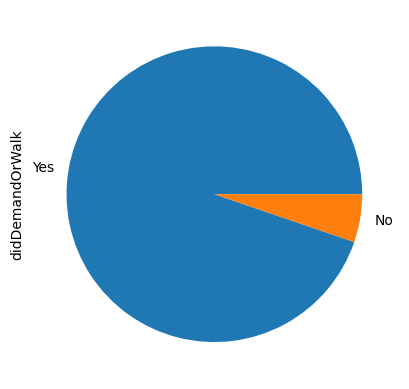

In [140]:
# print((df["didDemandOrWalk"] == "Yes").sum())
# print((df["didDemandOrWalk"] == "No").sum())

print(df["didDemandOrWalk"].value_counts().plot.pie())

While 6773 of 7148 walkers went for a walk after registering with the DogGo application, 375 walkers never went for a walk. In other words, approximately 95% of walkers went for a walk.

**f.	lifetime
i.	Date difference between signuptime and lastWalk (unit: Days)**


In [141]:
df["signuptime"] = pd.to_datetime(df["signuptime"])
df["checkintime"] = pd.to_datetime(df["checkintime"])
lifetime = (df["checkintime"].max() - df["signuptime"]).dt.days
df["lifetime"] = lifetime
print(df["lifetime"])

0       480
1       381
2       478
3       137
4       137
       ... 
7143    785
7144    785
7145    785
7146    785
7147      5
Name: lifetime, Length: 7148, dtype: int64


In [57]:
# print(df["lifetime"].min())
# print(df["lifetime"].max())

According to the data, among the users there are users who registered with the application and used it for a maximum of 786 days.

**g.	averageLifetime
i.	The tag that walker is in the app more or less than average of all walkers
ii.	Label: Less/More**


In [142]:
averageLifetime = lifetime.mean()
df["averageLifetime"] = "More"
df.loc[df["walkerid"].count() < averageLifetime, "averageLifetime"] = "Less"
print(df["averageLifetime"])

0        Less
1        More
2        More
3        More
4        More
         ... 
7144     More
7145     More
7146     More
7147     More
False    Less
Name: averageLifetime, Length: 7149, dtype: object


Axes(0.22375,0.11;0.5775x0.77)


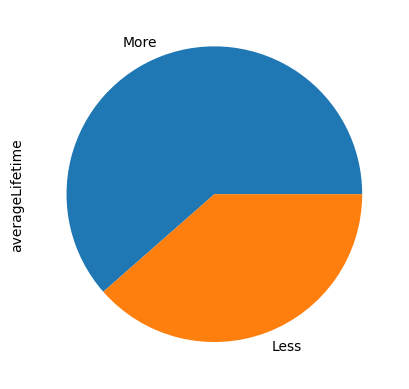

In [66]:
# print((df["averageLifetime"] == "More").sum())
# print((df["averageLifetime"] == "Less").sum())

print(df["averageLifetime"].value_counts().plot.pie())

While 4394 walkers walked more than the average of all walkers on the app, 2754 walkers walked less than the average user. It means that approximately 61.5% users walked more than the average user.

**h.	averageWalk
i.	The tag that walker is done more or less walks than average of all walkers done. Compare walker total the walk count with average of all walkers
ii.	Label: Less/More**

In [ ]:
'''
averageWalk = totalWalks.mean()
df["averageWalk"] = "More"
df.loc[df["totalWalks"] < averageWalk, "averageWalk"] = "Less"
print(df["averageWalk"])
'''

**i.	firstWalkAfterSignup
i.	Date difference between walker’s signup date and first walk date (Unit: Days)**

In [123]:
df["signuptime"] = pd.to_datetime(df["signuptime"])
df["checkintime"] = pd.to_datetime(df["checkintime"])
firstWalkAfterSignup = (df["signuptime"] - df["checkintime"].min()).dt.days
df["firstWalkAfterSignup"] = firstWalkAfterSignup
print(firstWalkAfterSignup)

0        304.0
1        403.0
2        306.0
3        647.0
4        647.0
         ...  
7144      -1.0
7145      -1.0
7146      -1.0
7147     779.0
False      NaN
Name: signuptime, Length: 7149, dtype: float64


**j.	firstWalkinWeek
i.	The tag whether the walker walked in his first week in the application**

In [ ]:
'''
df["one_week_after_signed"] = df["signuptime"] + pd.Timedelta(days=7)
df["one_week_after_signed"] = pd.to_datetime(df["one_week_after_signed"])
df["checkintime"] = pd.to_datetime(df["checkintime"])
df["firstWalkinWeek"] = "No"
df.loc[df["checkintime"].min() <= df["one_week_after_signed"], "firstwalkinWeek"] = "Yes"
df.drop(columns=["one_week_after_signed"], inplace=True)
print(df["firstWalkinWeek"])
'''

In [ ]:
# print((df["firstWalkinWeek"] == 'Yes').sum())
# print((df["firstWalkinWeek"] == 'No').sum())

**k.	lastMonthWalks
i.	Number of walks done by walker in last 30 days**

In [158]:
df["checkintime"] = pd.to_datetime(df["checkintime"])
today = "26.02.2021 17:45:00"
today = pd.to_datetime(today)
thirty_days_ago = today - timedelta(days=30)
recent_walks = df[df["checkintime"] >= thirty_days_ago]
lastMonthWalks = recent_walks.groupby("walkerid").size().reset_index(name="lastMonthWalks")
print(lastMonthWalks)

                                walkerid  lastMonthWalks
0   09e59ced-1172-4744-a2bb-eb68ae83041c               5
1   0ab3e600-4f94-424c-9b83-f605d72476c4              15
2   1397c1a3-2af9-41c4-b691-890638e7d84c               5
3   174c9266-15a9-4c28-b6ba-8cc00f051620               2
4   1a997b08-8c03-4970-a63c-faeebddd0539              18
5   244818e0-34a4-4090-8c7e-fa3999acfd7b              19
6   2681ed5a-8ff7-415f-bd17-0717e7c40f49               1
7   2ca0f63e-16f1-44d6-9b82-2c24977581e4               1
8   33ce0158-cf03-489c-8421-1a59759f4b8c              24
9   39366a5d-7831-4161-9798-15ebfc181338               4
10  402c1152-1551-4104-9675-42e87fa52542               2
11  43644236-2807-453a-ba66-57a080efc1bb               1
12  4ad3ddfc-e004-4e7c-abba-b450d5eb3062               6
13  51bfa3ea-ab13-432e-a3d6-56aaaf909c57               7
14  5376ecf7-6f46-4060-bc8e-894e690b2fa8              27
15  5460a9a8-c917-4246-926a-21e9ab6046bc               8
16  54f3ee6f-ec65-40c0-a76d-903

**l.	activityTag
i.	The tag that measures walker’s activity
ii.	Whether the walker made a demand or walk in last 30 days**

In [209]:
today = "26.02.2021 17:45:00"
today = pd.to_datetime(today)
thirty_days_ago = today - timedelta(days=30)
df["checkintime"] = pd.to_datetime(df["checkintime"])
df["activityTag"] = "Inactive"
df.loc[df["checkintime"] >= thirty_days_ago, "activityTag"] = "Active"
df.loc[df["checkintime"] <= today, "activityTag"] = "Active"
print(df["activityTag"])


0        Inactive
1        Inactive
2        Inactive
3          Active
4          Active
           ...   
7144       Active
7145       Active
7146       Active
7147     Inactive
False    Inactive
Name: activityTag, Length: 7149, dtype: object


6773
376
Axes(0.22375,0.11;0.5775x0.77)


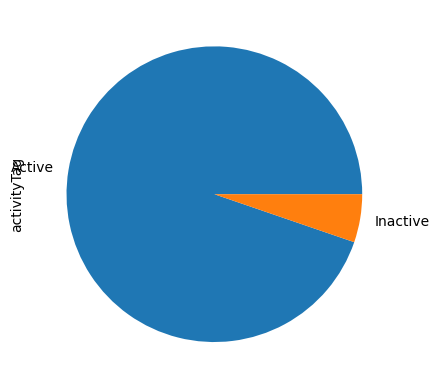

In [207]:
print((df["activityTag"] == "Active").sum())
print((df["activityTag"] == "Inactive").sum())

print(df["activityTag"].value_counts().plot.pie())

While 6773 walkers walked, 375 walkers did not walk  in last 30 days.

**m.	differentDistrictCount
i.	unique distinct number of districts that walker walked**

In [162]:
differentDistrictCount  = df.groupby("walkerid")["district"].nunique()
df["differentDistrictCount"] = differentDistrictCount
print(differentDistrictCount)

walkerid
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d    1
01d9cdcd-c770-4d29-8ca5-dd0770962b67    1
01fa4741-4138-472b-bdb6-d1f19fd2f44a    1
03b85e74-989f-4cf2-993f-d8411de50e3a    2
045cc0a5-afb1-4caa-9575-7faf6d3e1f69    2
                                       ..
fc597c8e-65bc-48f6-b5d9-b372238cd94d    2
fd1c862f-25a6-4051-a9b5-2776fb28345e    1
fde176dc-7f6b-408f-8c3e-6835b651d5ba    2
ff665506-7322-4fcf-adef-0fdc52a8bd71    3
ff709292-6ece-4d95-83d1-2b74aee65631    2
Name: district, Length: 355, dtype: int64


**n.	activeLifeTime
i.	time difference between last walk or last demand (later one) and fist walk of walker (last walk/ last demand - first walk)**

In [163]:
lastWalk = pd.to_datetime(lastWalk)
firstWalk = pd.to_datetime(firstWalk)
activeLifeTime = lastWalk - firstWalk
df["activeLifeTime"] = activeLifeTime
print(activeLifeTime)

walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef          21 days 00:00:00
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1   15 days 21:55:05.590000
00fef613-662c-4194-8de1-164942e25fb2          30 days 00:00:00
01adeee1-cb3d-46ff-9514-f4797299698c   19 days 18:30:59.225000
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d           2 days 00:45:00
                                                 ...          
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1         116 days 10:00:00
febe2751-8999-4f61-8c61-a5108a2981b3         113 days 14:30:00
ff665506-7322-4fcf-adef-0fdc52a8bd71         530 days 06:45:00
ff709292-6ece-4d95-83d1-2b74aee65631          25 days 00:30:00
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2           1 days 00:00:00
Name: checkintime, Length: 1129, dtype: timedelta64[ns]


**o.	totalActiveDayCount
i.	total number of walk day: number of days that walker has walking**

In [164]:
totalActiveDayCount = df.groupby("walkerid")["checkintime"].nunique()
df["totalActiveDayCount"] = totalActiveDayCount
print(totalActiveDayCount)

walkerid
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d      2
01d9cdcd-c770-4d29-8ca5-dd0770962b67      3
01fa4741-4138-472b-bdb6-d1f19fd2f44a      1
03b85e74-989f-4cf2-993f-d8411de50e3a      4
045cc0a5-afb1-4caa-9575-7faf6d3e1f69     18
                                       ... 
fc597c8e-65bc-48f6-b5d9-b372238cd94d      5
fd1c862f-25a6-4051-a9b5-2776fb28345e      2
fde176dc-7f6b-408f-8c3e-6835b651d5ba     23
ff665506-7322-4fcf-adef-0fdc52a8bd71    169
ff709292-6ece-4d95-83d1-2b74aee65631     15
Name: checkintime, Length: 355, dtype: int64


**p.	walkFrequency
i.	activeLifeTime/totalActiveDayCount**

In [133]:
walkFrequency = activeLifeTime/totalActiveDayCount
df["walkFrequency"] = walkFrequency
print(walkFrequency)

walkerid
00162fd3-21b4-4371-bebe-db6b081d86ef                         NaT
0082cfc9-ce2f-47b1-a1ae-5e0c45f903b1                         NaT
00fef613-662c-4194-8de1-164942e25fb2                         NaT
01adeee1-cb3d-46ff-9514-f4797299698c                         NaT
01b0fb51-4461-4638-95a5-8fc8c0ef1c9d             1 days 00:22:30
                                                  ...           
fe9bd5c2-c7fe-44c5-8013-457d693a3ec1                         NaT
febe2751-8999-4f61-8c61-a5108a2981b3                         NaT
ff665506-7322-4fcf-adef-0fdc52a8bd71   3 days 03:18:22.366863905
ff709292-6ece-4d95-83d1-2b74aee65631             1 days 16:02:00
ffc3fe3e-1fd8-4979-a90d-7b8a076be0d2                         NaT
Name: checkintime, Length: 1129, dtype: timedelta64[ns]


**q.	dailyWalkAverage
i.	totalWalk/totalActiveDayCount**

In [ ]:
'''
dailyWalkAverage = totalWalks/totalActiveDayCount
print(dailyWalkAverage)
'''

**r.	walksWithNoDemands
i.	Find walks done without any demand**

In [173]:
df4 = pd.merge(df1, df3, on="walkerid", how="outer")
walksWithNoDemands = df4[df4["demandtime"].isnull()]
print(walksWithNoDemands)

         Unnamed: 0                             ownerid_x  \
173346          7.0  e67b36e4-8b73-4ac6-9503-9e2fba8a177d   
173347      16529.0  e67b36e4-8b73-4ac6-9503-9e2fba8a177d   
174903         11.0  3bede1b6-0498-437b-a50a-f86e1fc8c938   
174904         70.0  6d643c76-109f-4b3e-a09e-1b8f55d3b11d   
174905        122.0  e61db060-7c7d-4b6c-bad0-485943233732   
...             ...                                   ...   
1384134     17916.0  4192aad1-d1df-4e0b-8515-a281b5555753   
1384135     17927.0  6c6b9a63-8f1e-4c28-b951-c92ea111bc24   
1384136     18018.0  43b72967-b365-4d81-a283-4f77c5662f68   
1384137     18021.0  6777f900-bd9f-4ced-bb8c-943260a812ab   
1384150     18187.0  513146d5-1343-4296-b76a-1a0ea2b978d4   

                                       walkid  \
173346   0daeee3e-ef24-4fb0-96bb-a77ac647825e   
173347   7de2b1a2-c69f-4128-8eee-0a51537570eb   
174903   51183f4e-4667-4675-b10f-7bb5424c146b   
174904   04ab50b0-5cf7-4391-a129-7217b1c08291   
174905   5bd8868d-6a8d

**s.	totalDemandCount**

In [172]:
totalDemandCount = df3["demandtime"].notnull().sum()
print(totalDemandCount)

22802


**t.	last30DaysDemandCount**

In [171]:
df3["demandtime"] = pd.to_datetime(df3["demandtime"])
last_30_days_demand = df3[df3["demandtime"] >= thirty_days_ago]
last30DaysDemandCount = len(last_30_days_demand)
print(last30DaysDemandCount)

2414


**u.	weeklyAverageDemandCount**

In [170]:
df3["demandtime"] = pd.to_datetime(df3["demandtime"])
df3["week_number"] = df3["demandtime"].dt.strftime("%U")
weeklyAverageDemandCount = df3.groupby("week_number").size().mean()
print(weeklyAverageDemandCount)

633.3888888888889
